In [17]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [18]:
# Set Alpaca API key and secret
alpaca_api_key = ('PKL4RBF33XX5FPJZ4BG2')
alpaca_secret_key = ('yP7fmDc30U6BWfyXDMwdcYoPMCVKVNmMEjd5AFVF')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [19]:
#monte carlo simulation
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

# Set the ticker information
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [20]:
# Get 5 years' worth of historical data for ALL TICKERS 

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-05-01 04:00:00+00:00,78.86,78.8700,78.730,78.75,1410698,6344,78.767330,BND
2018-05-02 04:00:00+00:00,78.82,78.8600,78.730,78.76,1435417,6614,78.778533,BND
2018-05-03 04:00:00+00:00,78.90,78.9500,78.820,78.83,1477760,7674,78.879394,BND
2018-05-04 04:00:00+00:00,78.92,78.9500,78.780,78.88,1342412,6674,78.843544,BND
2018-05-07 04:00:00+00:00,78.89,78.9000,78.810,78.84,1634374,6975,78.842336,BND
...,...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,204.02,204.2300,201.615,201.66,2607021,54053,202.868668,VTI
2023-04-26 04:00:00+00:00,202.16,202.5094,200.410,200.75,2762633,55605,201.465732,VTI
2023-04-27 04:00:00+00:00,201.86,204.6900,201.830,204.52,2254594,41519,203.120760,VTI


In [21]:
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
BND = df_ticker[df_ticker['symbol']=='BND'].drop('symbol', axis=1)
GLD = df_ticker[df_ticker['symbol']=='GLD'].drop('symbol', axis=1)
QQQ = df_ticker[df_ticker['symbol']=='QQQ'].drop('symbol', axis=1)
VTI = df_ticker[df_ticker['symbol']=='VTI'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, BND, GLD, QQQ, VTI], axis=1, keys=["SPY", "BND","GLD","QQQ","VTI"])

# Display sample data
df_ticker.head()

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2018-05-01 04:00:00+00:00  263.87  265.1000  262.11  264.96   76110600   
2018-05-02 04:00:00+00:00  264.76  265.6800  262.76  263.17   86373743   
2018-05-03 04:00:00+00:00  262.26  263.3600  259.05  262.59  136921861   
2018-05-04 04:00:00+00:00  261.52  266.7892  261.15  265.92   91230645   
2018-05-07 04:00:00+00:00  266.89  268.0200  266.11  266.92   56495099   

                                                     BND                ...  \
                          trade_count        vwap   open   high    low  ...   
timestamp                                                               ...   
2018-05-01 04:00:00+00:00      296318  263.924372  78.86  78.87  78.73  ...   
2018-05-02 04:00:00+00:00      300565  264.118423  78.82  78.86  78.73  ...   
2018-05-03 04:00:00+00:00      519981  261.686187  78.90  78.95  78.82  ...   
2018-05-04 04:00:00+00:00      326945  264.854905  78.92  78.95  78.78  ...   
2018-05-07 04:00:00+00:00      242699  267.100589  78.89  78.90  78.81  ...   

                                QQQ                             VTI            \
                             volume trade_count        vwap    open      high   
timestamp                                                                       
2018-05-01 04:00:00+00:00  36513529      142927  161.342664  136.04  136.6000   
2018-05-02 04:00:00+00:00  38893642      137534  162.596514  136.46  136.9700   
2018-05-03 04:00:00+00:00  61468584      218497  161.029137  135.19  135.8036   
2018-05-04 04:00:00+00:00  41573293      157320  163.927335  134.97  137.5600   
2018-05-07 04:00:00+00:00  33231552      130377  166.239992  137.65  138.3100   

                                                                             
                               low   close   volume trade_count        vwap  
timestamp                                                                    
2018-05-01 04:00:00+00:00  135.120  136.51  1762742       20064  135.749989  
2018-05-02 04:00:00+00:00  135.540  135.75  1661568       23949  136.283411  
2018-05-03 04:00:00+00:00  133.660  135.38  2638105       30422  134.785683  
2018-05-04 04:00:00+00:00  134.640  137.11  2379400       16220  136.670539  
2018-05-07 04:00:00+00:00  137.375  137.73  1448023       12069  137.915396  

[5 rows x 35 columns]

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.1,.1,.2,.3,.3],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2018-05-01 04:00:00+00:00  263.87  265.1000  262.11  264.96   76110600   
2018-05-02 04:00:00+00:00  264.76  265.6800  262.76  263.17   86373743   
2018-05-03 04:00:00+00:00  262.26  263.3600  259.05  262.59  136921861   
2018-05-04 04:00:00+00:00  261.52  266.7892  261.15  265.92   91230645   
2018-05-07 04:00:00+00:00  266.89  268.0200  266.11  266.92   56495099   

                                                                  BND         \
                          trade_count        vwap daily_return   open   high   
timestamp                                                                      
2018-05-01 04:00:00+00:00      296318  263.924372          NaN  78.86  78.87   
2018-05-02 04:00:00+00:00      300565  264.118423    -0.006756  78.82  78.86   
2018-05-03 04:00:00+00:00      519981  261.686187    -0.002204  78.90  78.95   
2018-05-04 04:00:00+00:00      326945  264.854905     0.012681  78.92  78.95   
2018-05-07 04:00:00+00:00      242699  267.100589     0.003761  78.89  78.90   

                           ...         QQQ                  VTI            \
                           ...        vwap daily_return    open      high   
timestamp                  ...                                              
2018-05-01 04:00:00+00:00  ...  161.342664          NaN  136.04  136.6000   
2018-05-02 04:00:00+00:00  ...  162.596514    -0.005898  136.46  136.9700   
2018-05-03 04:00:00+00:00  ...  161.029137    -0.000124  135.19  135.8036   
2018-05-04 04:00:00+00:00  ...  163.927335     0.018974  134.97  137.5600   
2018-05-07 04:00:00+00:00  ...  166.239992     0.008310  137.65  138.3100   

                                                                             \
                               low   close   volume trade_count        vwap   
timestamp                                                                     
2018-05-01 04:00:00+00:00  135.120  136.51  1762742       20064  135.749989   
2018-05-02 04:00:00+00:00  135.540  135.75  1661568       23949  136.283411   
2018-05-03 04:00:00+00:00  133.660  135.38  2638105       30422  134.785683   
2018-05-04 04:00:00+00:00  134.640  137.11  2379400       16220  136.670539   
2018-05-07 04:00:00+00:00  137.375  137.73  1448023       12069  137.915396   

                                        
                          daily_return  
timestamp                               
2018-05-01 04:00:00+00:00          NaN  
2018-05-02 04:00:00+00:00    -0.005567  
2018-05-03 04:00:00+00:00    -0.002726  
2018-05-04 04:00:00+00:00     0.012779  
2018-05-07 04:00:00+00:00     0.004522  

[5 rows x 40 columns]

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998168,1.006666,1.001326,1.000313,0.999245,0.996852,1.010762,0.994297,1.001181,1.004243,...,0.993204,0.999953,0.996999,0.995694,0.997433,1.009526,1.011109,0.992603,1.001083,0.994140
2,1.004820,1.004599,0.995641,1.017572,1.000034,0.993997,1.019208,1.005343,1.000331,1.001877,...,0.988355,1.010661,0.999496,0.990226,1.011127,1.008514,1.004868,0.993000,1.006659,0.984119
3,1.006514,1.014385,0.993389,1.021341,1.014204,1.001059,1.017825,1.007465,1.007372,1.000408,...,0.993880,1.011492,1.011502,0.988295,1.019682,1.002618,1.007680,0.991535,1.001576,0.982078
4,1.018366,1.013340,0.996070,1.028056,1.017534,1.008967,1.019994,1.007525,1.001197,0.996475,...,0.986250,1.022453,1.015483,0.981182,1.024307,1.019773,0.992962,1.003902,1.004268,0.984714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,33.768321,12.007564,33.414045,60.690053,18.635087,17.833809,18.482628,42.262838,31.758212,30.061217,...,25.539555,18.615117,15.394631,20.622146,48.945991,37.483394,31.645176,17.218518,70.632734,17.600135
7557,33.827134,12.136743,33.878278,61.043018,18.653443,17.975900,18.459031,42.372467,31.664057,29.967740,...,25.153779,18.635125,15.302806,20.625619,48.885357,37.366442,31.330053,17.311311,71.164097,17.701187
7558,33.848828,12.115285,33.821643,61.025333,18.671882,17.935279,18.609367,42.357493,31.926069,30.142053,...,25.289868,18.858265,15.573230,20.615287,48.824840,37.122495,31.542711,17.410715,70.904481,17.372759
7559,33.703661,12.122750,34.003625,60.991476,18.749859,17.922205,18.535169,42.626124,31.756345,30.525886,...,25.194119,18.861297,15.642733,20.687144,48.447246,37.321696,31.686401,17.433701,70.736074,17.292546


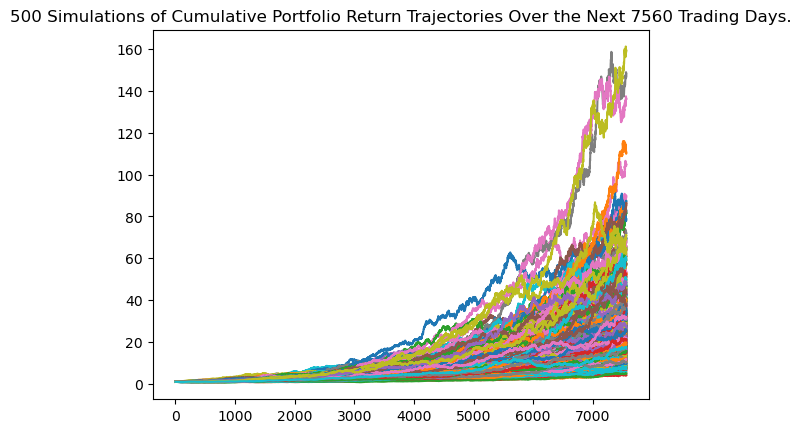

In [38]:
 # Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

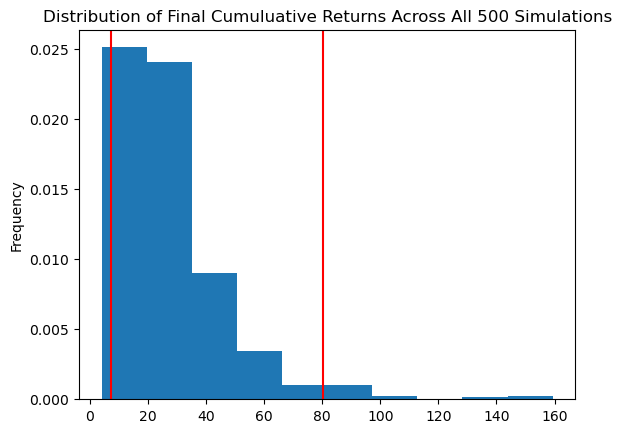

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             27.965870
std              19.176582
min               4.082339
25%              15.681931
50%              23.272552
75%              34.165499
max             159.322837
95% CI Lower      7.442094
95% CI Upper     80.367091
Name: 7560, dtype: float64


In [41]:
# Set initial investment
initial_investment = 14000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*14000,2)
ci_upper = round(tbl[9]*14000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $14000 in the portfolio over the next 30 years will end within in the range of $104189.32 and $1125139.28


In [42]:
#Sharpe Ratio = (excpected return - risk free rate)/volatility
print((27.965870-2.0)/19.1765)

1.354046358824603
